In [49]:
!pip install pandas
!pip install matplotlib

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'wandb_export_leader individual reward.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,Step,frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward,frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward__MIN,frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward__MAX,frozen_best_leader_new_follower_seed0_neutral_fixed - leader.individual_reward,frozen_best_leader_new_follower_seed0_neutral_fixed - leader.individual_reward__MIN,frozen_best_leader_new_follower_seed0_neutral_fixed - leader.individual_reward__MAX,frozen_best_leader_new_follower_seed_0 - leader.individual_reward,frozen_best_leader_new_follower_seed_0 - leader.individual_reward__MIN,frozen_best_leader_new_follower_seed_0 - leader.individual_reward__MAX
0,0,111.8750,111.8750,111.8750,56.1250,56.1250,56.1250,NaN,NaN,NaN
1,1,115.2500,115.2500,115.2500,57.0625,57.0625,57.0625,NaN,NaN,NaN
2,2,107.3750,107.3750,107.3750,NaN,NaN,NaN,NaN,NaN,NaN
3,3,113.9375,113.9375,113.9375,57.1875,57.1875,57.1875,NaN,NaN,NaN
4,4,107.8125,107.8125,107.8125,56.2500,56.2500,56.2500,NaN,NaN,NaN


In [51]:
# Verify the structure of the dataframe
print(df.columns)
print(df.head())

Index(['Step',
       'frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward',
       'frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward__MIN',
       'frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward__MAX',
       'frozen_best_leader_new_follower_seed0_neutral_fixed - leader.individual_reward',
       'frozen_best_leader_new_follower_seed0_neutral_fixed - leader.individual_reward__MIN',
       'frozen_best_leader_new_follower_seed0_neutral_fixed - leader.individual_reward__MAX',
       'frozen_best_leader_new_follower_seed_0 - leader.individual_reward',
       'frozen_best_leader_new_follower_seed_0 - leader.individual_reward__MIN',
       'frozen_best_leader_new_follower_seed_0 - leader.individual_reward__MAX'],
      dtype='object')
   Step  \
0     0   
1     1   
2     2   
3     3   
4     4   

   frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward  \
0             

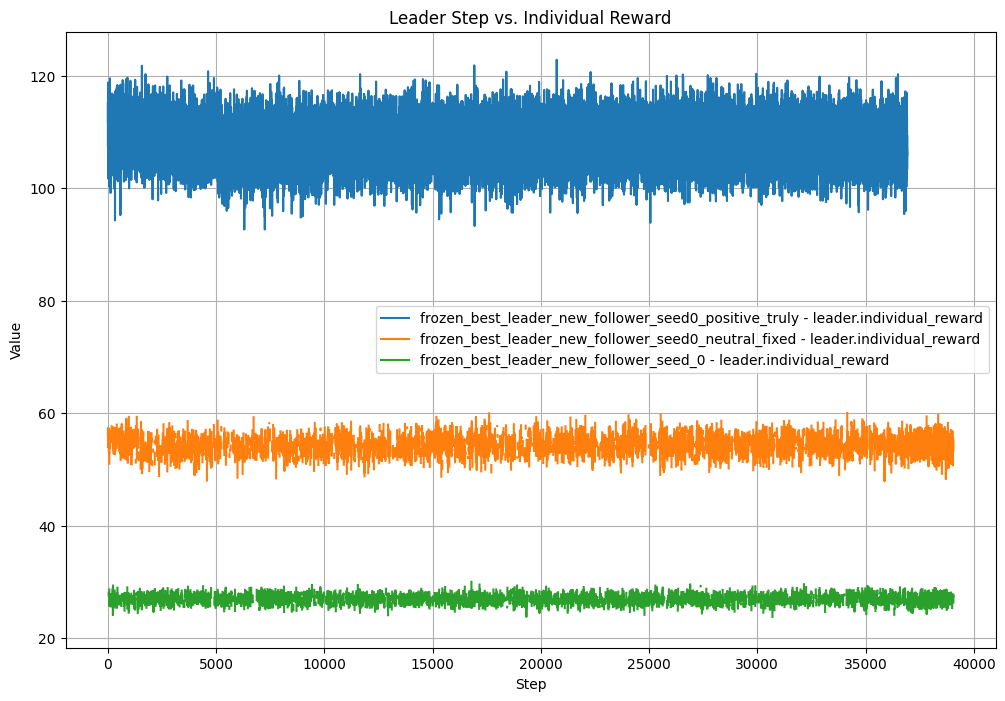

In [52]:
# Extract columns without MAX and MIN
columns_to_plot = [col for col in df.columns if '__MAX' not in col and '__MIN' not in col and col != 'Step']

# Plot the data
plt.figure(figsize=(12, 8))

for column in columns_to_plot:
    plt.plot(df['Step'], df[column], label=column)

plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Leader Step vs. Individual Reward')
plt.legend()
plt.grid(True)
plt.show()

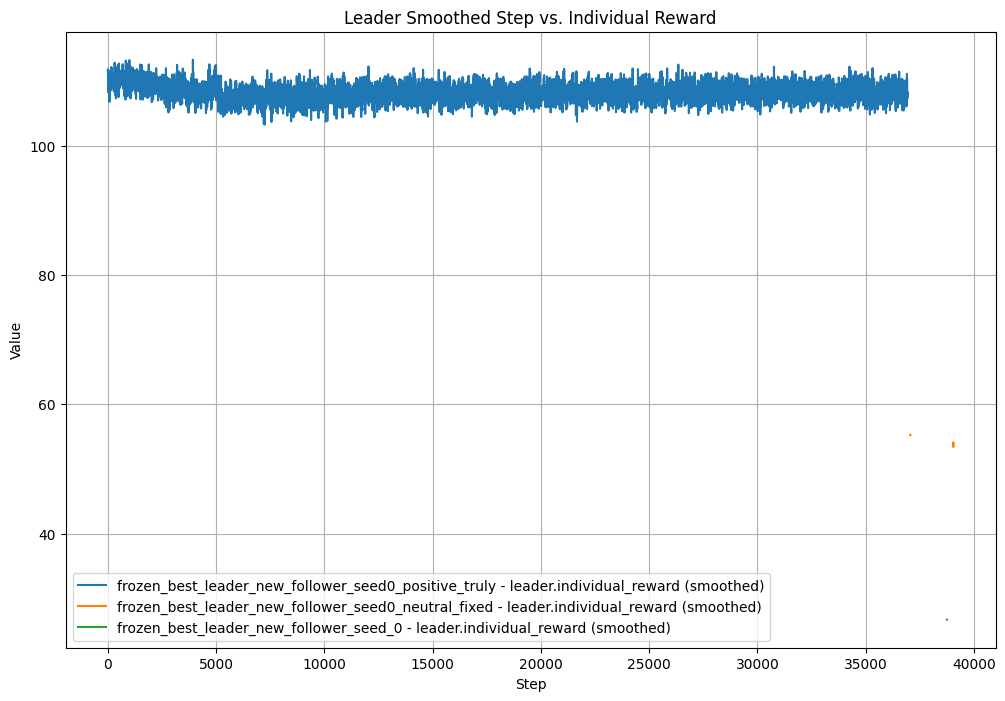

In [53]:
# Extract columns without MAX and MIN
columns_to_plot = [col for col in df.columns if '__MAX' not in col and '__MIN' not in col and col != 'Step']

# Define the window size for smoothing
window_size = 10  # You can adjust the window size as needed

# Plot the smoothed data
plt.figure(figsize=(12, 8))

for column in columns_to_plot:
    smoothed_data = df[column].rolling(window=window_size).mean()
    plt.plot(df['Step'], smoothed_data, label=f"{column} (smoothed)")

plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Leader Smoothed Step vs. Individual Reward')
plt.legend()
plt.grid(True)
plt.show()

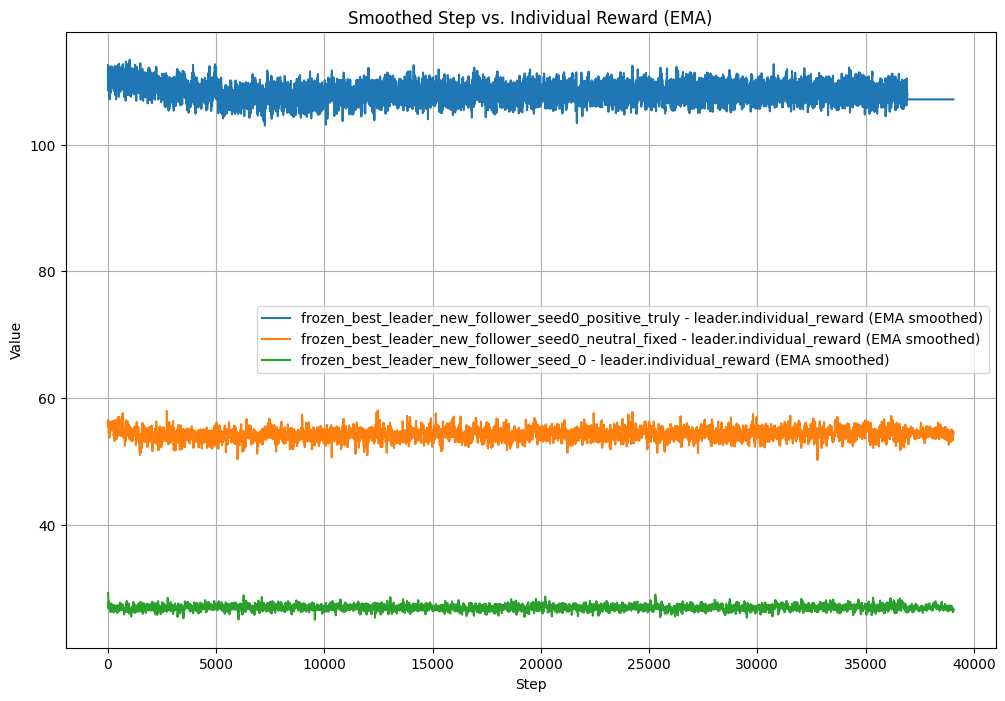

In [54]:
# Define the span for EMA
span = 10  # You can adjust the span as needed

# Plot the smoothed data
plt.figure(figsize=(12, 8))

for column in columns_to_plot:
    smoothed_data = df[column].ewm(span=span, adjust=False).mean()
    plt.plot(df['Step'], smoothed_data, label=f"{column} (EMA smoothed)")

plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Smoothed Step vs. Individual Reward (EMA)')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
!pip install scipy
from scipy.signal import savgol_filter

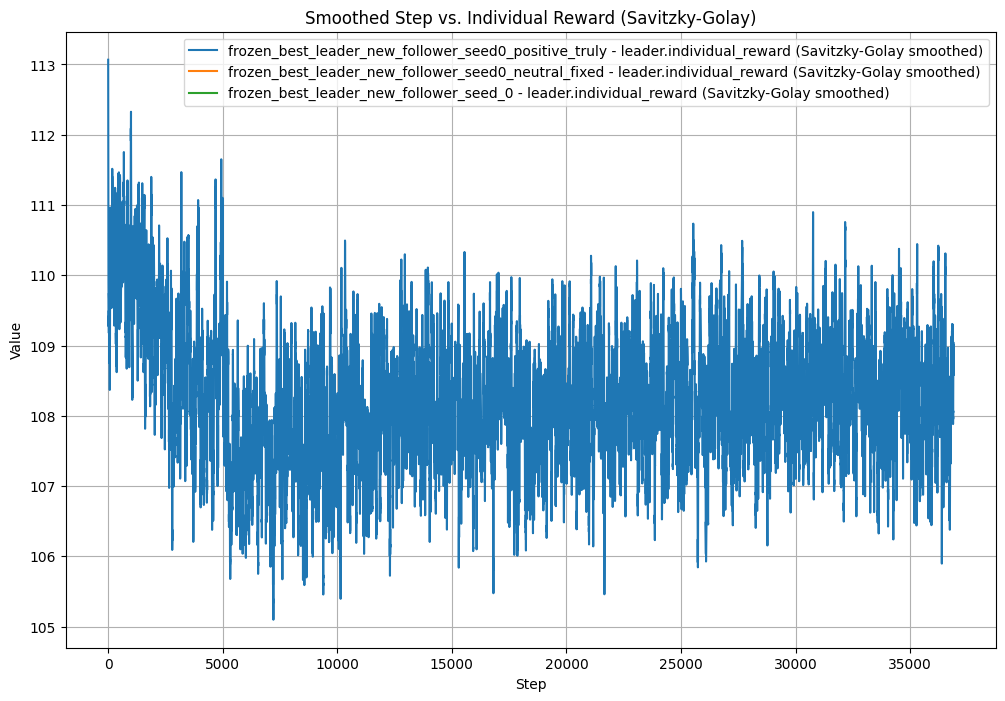

In [56]:
# Define the window length and polynomial order for Savitzky-Golay filter
window_length = 51  # You can adjust the window length as needed (must be odd)
polyorder = 3      # Polynomial order

# Plot the smoothed data
plt.figure(figsize=(12, 8))

for column in columns_to_plot:
    smoothed_data = savgol_filter(df[column], window_length=window_length, polyorder=polyorder)
    plt.plot(df['Step'], smoothed_data, label=f"{column} (Savitzky-Golay smoothed)")

plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Smoothed Step vs. Individual Reward (Savitzky-Golay)')
plt.legend()
plt.grid(True)
plt.show()

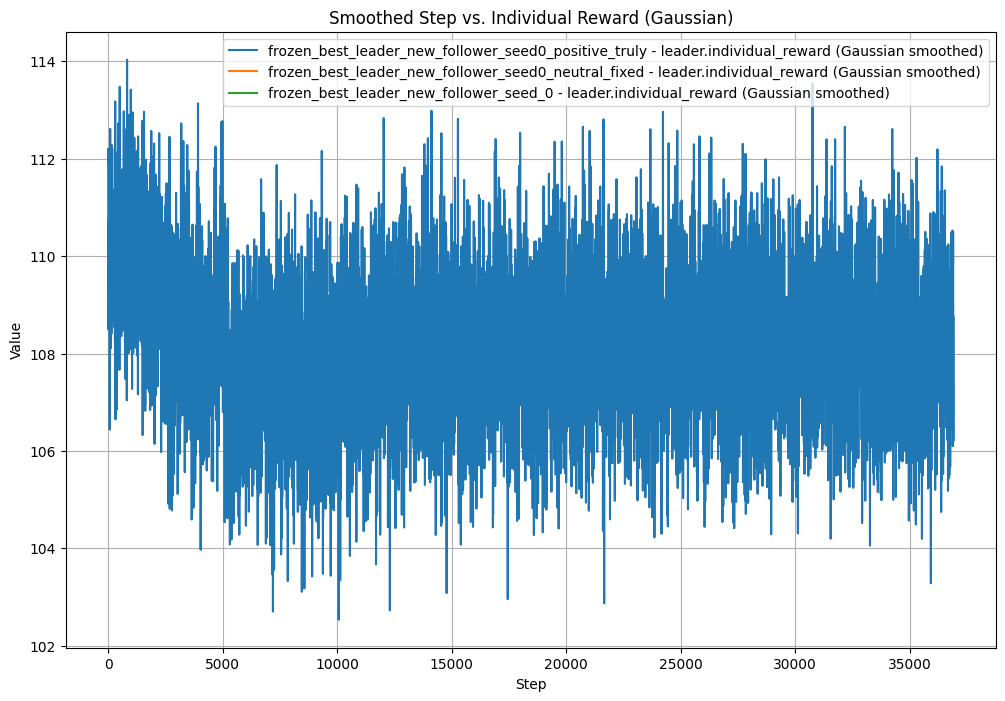

In [57]:
from scipy.ndimage import gaussian_filter1d

columns_to_plot = [col for col in df.columns if '__MAX' not in col and '__MIN' not in col and col != 'Step']

# Define the sigma for Gaussian filter
sigma = 2  # You can adjust the sigma as needed

# Plot the smoothed data
plt.figure(figsize=(12, 8))

for column in columns_to_plot:
    smoothed_data = gaussian_filter1d(df[column], sigma=sigma)
    plt.plot(df['Step'], smoothed_data, label=f"{column} (Gaussian smoothed)")

plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Smoothed Step vs. Individual Reward (Gaussian)')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
import statsmodels.api as sm

# Extract columns without MAX and MIN
columns_to_plot = [col for col in df.columns if '__MAX' not in col and '__MIN' not in col and col != 'Step']

# Define the fraction for LOESS
frac = 0.1  # You can adjust the fraction as needed

# Plot the smoothed data
plt.figure(figsize=(12, 8))

for column in columns_to_plot:
    lowess = sm.nonparametric.lowess(df[column], df['Step'], frac=frac)
    plt.plot(lowess[:, 0], lowess[:, 1], label=f"{column} (LOESS smoothed)")

plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Smoothed Step vs. Individual Reward (LOESS)')
plt.legend()
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

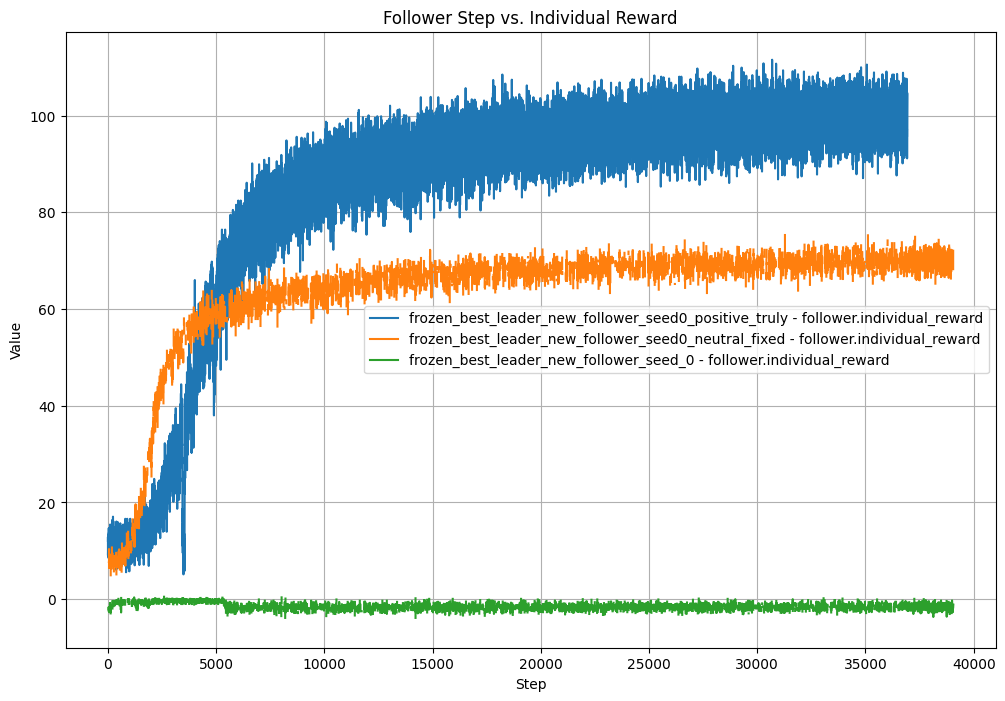

In [ ]:
# Follower plotting code
follower_file_path = 'wandb_export_follower individual reward.csv'

# Read the CSV file
df_follow = pd.read_csv(follower_file_path)

# Display the first few rows of the dataframe
df_follow.head()

# Extract columns without MAX and MIN
columns_to_plot = [col for col in df_follow.columns if '__MAX' not in col and '__MIN' not in col and col != 'Step']

# Plot the data
plt.figure(figsize=(12, 8))

for column in columns_to_plot:
    plt.plot(df_follow['Step'], df_follow[column], label=column)

plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Follower Step vs. Individual Reward')
plt.legend()
plt.grid(True)
plt.show()

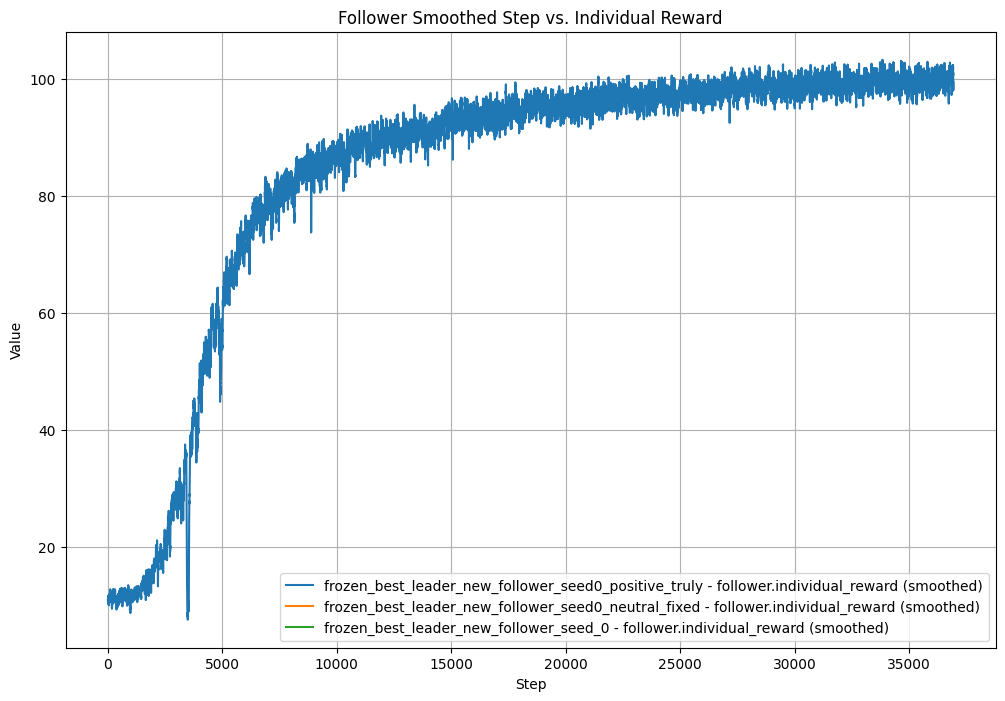

In [ ]:
# Extract columns without MAX and MIN
columns_to_plot = [col for col in df_follow.columns if '__MAX' not in col and '__MIN' not in col and col != 'Step']

# Define the window size for smoothing
window_size = 10  # You can adjust the window size as needed

# Plot the smoothed data
plt.figure(figsize=(12, 8))

for column in columns_to_plot:
    smoothed_data = df_follow[column].rolling(window=window_size).mean()
    plt.plot(df_follow['Step'], smoothed_data, label=f"{column} (smoothed)")

plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Follower Smoothed Step vs. Individual Reward')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Replace 'leader_file.csv' and 'follower_file.csv' with the paths to your CSV files
leader_file_path = 'wandb_export_leader individual reward.csv'
follower_file_path = 'wandb_export_follower individual reward.csv'

# Read the CSV files
leader_df = pd.read_csv(leader_file_path)
follower_df = pd.read_csv(follower_file_path)

# diff_df = pd.DataFrame(leader_df.iloc[:, 0].copy(), columns=[leader_df.columns[0]])
diff_df = leader_df.copy()

# Iterate over each column (except the first one)
for i in range(1, diff_df.shape[1]):
    # Calculate the difference between corresponding columns in df2 and df1
    difference = (follower_df.iloc[:, i] - leader_df.iloc[:, i]) / abs(leader_df.iloc[:, i])
    # print(difference.shape)
    col_name = diff_df.columns[i]
    diff_df["diff_" + col_name] = difference
    

# Display the first few rows of the new dataframe
# print(diff_df.head())
# Print the column names of the new dataframe
print(diff_df.columns)

Index(['Step',
       'frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward',
       'frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward__MIN',
       'frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward__MAX',
       'frozen_best_leader_new_follower_seed0_neutral_fixed - leader.individual_reward',
       'frozen_best_leader_new_follower_seed0_neutral_fixed - leader.individual_reward__MIN',
       'frozen_best_leader_new_follower_seed0_neutral_fixed - leader.individual_reward__MAX',
       'frozen_best_leader_new_follower_seed_0 - leader.individual_reward',
       'frozen_best_leader_new_follower_seed_0 - leader.individual_reward__MIN',
       'frozen_best_leader_new_follower_seed_0 - leader.individual_reward__MAX',
       'diff_frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward',
       'diff_frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward__M

In [61]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 469.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 853.3 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 908.0 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00


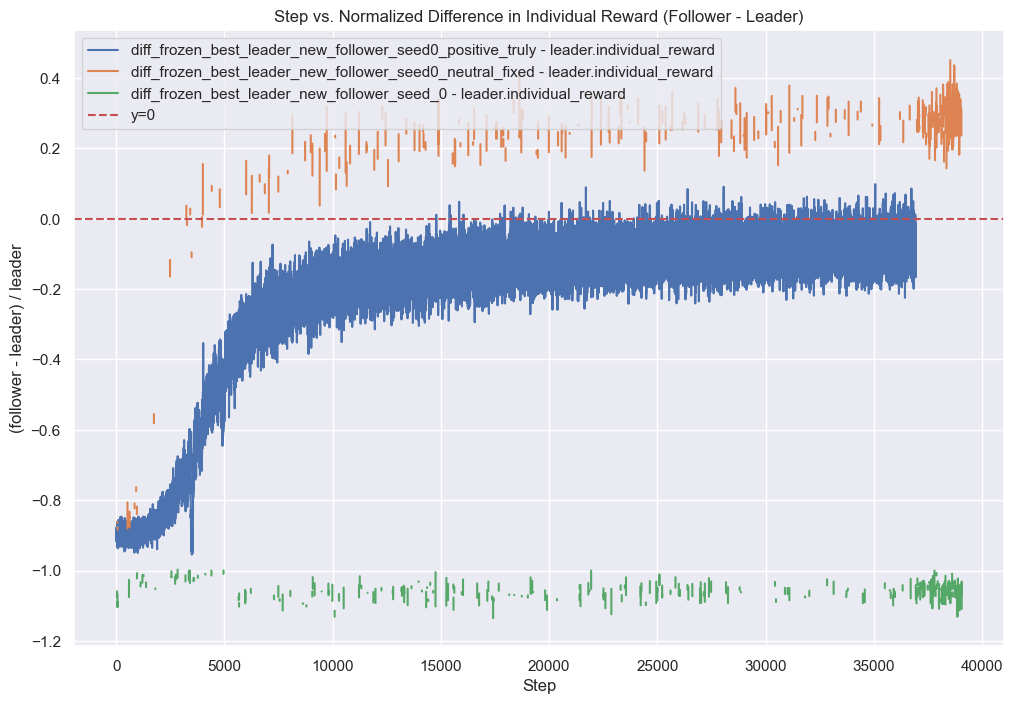

In [64]:
import seaborn as sns
sns.set()

# Extract diff columns without MAX and MIN
columns_to_plot = [col for col in diff_df.columns if '__MAX' not in col and '__MIN' not in col and col != 'Step' and 'diff' in col]

# Plot the data
plt.figure(figsize=(12, 8))

for column in columns_to_plot:
    plt.plot(diff_df['Step'], diff_df[column], label=column)

# Plot a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='y=0')

plt.xlabel('Step')
plt.ylabel('(follower - leader) / leader')
plt.title('Step vs. Normalized Difference in Individual Reward (Follower - Leader)')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Ratio Improvement

# Replace 'leader_file.csv' and 'follower_file.csv' with the paths to your CSV files
leader_file_path = 'wandb_export_leader individual reward.csv'
follower_file_path = 'wandb_export_follower individual reward.csv'

# Read the CSV files
leader_df = pd.read_csv(leader_file_path)
follower_df = pd.read_csv(follower_file_path)

# diff_df = pd.DataFrame(leader_df.iloc[:, 0].copy(), columns=[leader_df.columns[0]])
ratio_df = leader_df.copy()

# Iterate over each column (except the first one)
for i in range(1, ratio_df.shape[1]):
    # Calculate the difference between corresponding columns in df2 and df1
    difference = (follower_df.iloc[:, i] / leader_df.iloc[:, i])
    # print(difference.shape)
    col_name = ratio_df.columns[i]
    ratio_df["ratio_" + col_name] = difference
    
print(ratio_df.columns)

Index(['Step',
       'frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward',
       'frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward__MIN',
       'frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward__MAX',
       'frozen_best_leader_new_follower_seed0_neutral_fixed - leader.individual_reward',
       'frozen_best_leader_new_follower_seed0_neutral_fixed - leader.individual_reward__MIN',
       'frozen_best_leader_new_follower_seed0_neutral_fixed - leader.individual_reward__MAX',
       'frozen_best_leader_new_follower_seed_0 - leader.individual_reward',
       'frozen_best_leader_new_follower_seed_0 - leader.individual_reward__MIN',
       'frozen_best_leader_new_follower_seed_0 - leader.individual_reward__MAX',
       'ratio_frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward',
       'ratio_frozen_best_leader_new_follower_seed0_positive_truly - leader.individual_reward_

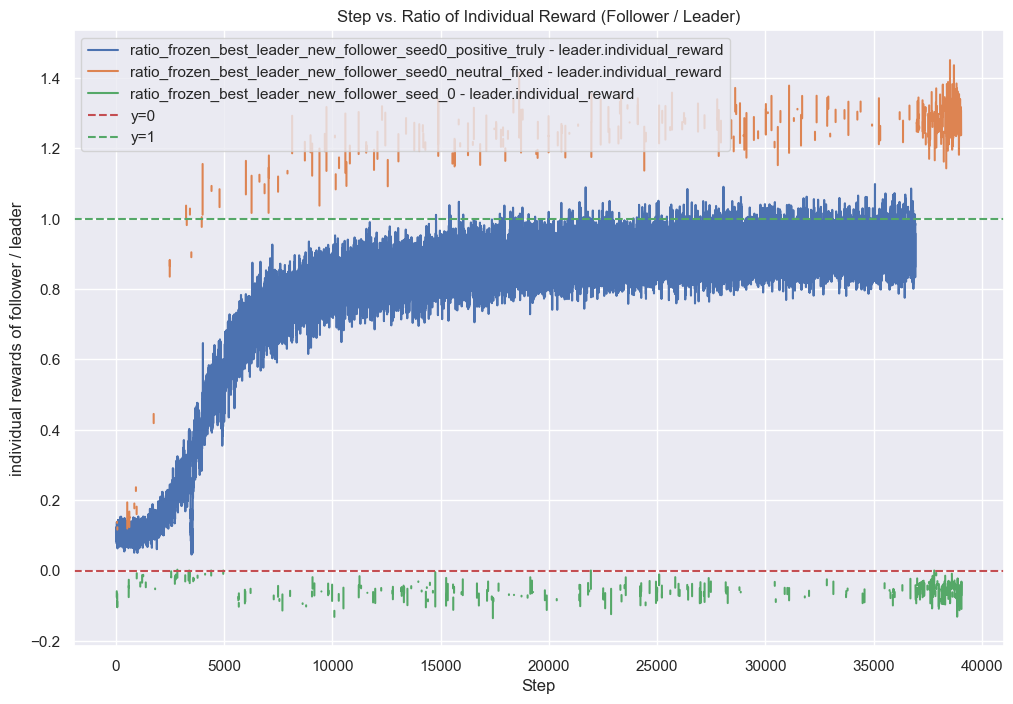

In [67]:
sns.set()

# Extract diff columns without MAX and MIN
columns_to_plot = [col for col in ratio_df.columns if '__MAX' not in col and '__MIN' not in col and col != 'Step' and 'ratio' in col]

# Plot the data
plt.figure(figsize=(12, 8))

for column in columns_to_plot:
    plt.plot(ratio_df['Step'], ratio_df[column], label=column)

# Plot a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='y=0')
# Plot a horizontal line at y=1
plt.axhline(y=1, color='g', linestyle='--', label='y=1')

plt.xlabel('Step')
plt.ylabel('individual rewards of follower / leader')
plt.title('Step vs. Ratio of Individual Reward (Follower / Leader)')
plt.legend()
plt.grid(True)
plt.show()